In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("Statewise.csv")

In [3]:
data.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [4]:
data.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        3772
Positive        3200
dtype: int64

In [5]:
data["Negative"] = pd.to_numeric(data.Negative, errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8066 entries, 0 to 8065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8066 non-null   object 
 1   State         8066 non-null   object 
 2   TotalSamples  8066 non-null   float64
 3   Negative      4293 non-null   float64
 4   Positive      4866 non-null   float64
dtypes: float64(3), object(2)
memory usage: 315.2+ KB


In [7]:
data.describe()

,TotalSamples,Negative,Positive
count,8.066000e+03,4.293000e+03,4.866000e+03
mean,1.503140e+06,6.940890e+05,4.317863e+04
std,2.709261e+06,1.279840e+06,1.536970e+05
min,5.800000e+01,0.000000e+00,0.000000e+00
25%,4.659300e+04,2.559200e+04,3.632500e+02
50%,2.604005e+05,1.448140e+05,2.928500e+03
75%,1.780533e+06,6.326560e+05,2.223100e+04
max,2.062145e+07,9.581330e+06,1.638961e+06


In [8]:
data["Negative"].mean()

694089.0435592826

In [9]:
data["Positive"].mean()

43178.62679819153

In [10]:
data["Positive"] = data["Positive"].fillna(43.0)

In [11]:
data["Negative"] = data["Negative"].fillna(6940)

In [12]:
data.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,6940.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,6940.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,6940.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6940.0,33.0


In [13]:
#As date and time is an object datatype, converting this datatype into a time stamp
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [14]:
for i in ['Date']:
    change_into_datetime(i)

In [15]:
data["Day"]=data["Date"].dt.day

In [16]:
data["Month"]=data["Date"].dt.month

In [17]:
data["Year"] = data["Date"].dt.year

In [18]:
data.head()

,Date,State,TotalSamples,Negative,Positive,Day,Month,Year
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0,17,4,2020
1,2020-04-24,Andaman and Nicobar Islands,2679.0,6940.0,27.0,24,4,2020
2,2020-04-27,Andaman and Nicobar Islands,2848.0,6940.0,33.0,27,4,2020
3,2020-05-01,Andaman and Nicobar Islands,3754.0,6940.0,33.0,1,5,2020
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6940.0,33.0,16,5,2020


In [19]:
data.drop("Date", axis=1, inplace=True)

In [20]:
data.head()

,State,TotalSamples,Negative,Positive,Day,Month,Year
0,Andaman and Nicobar Islands,1403.0,1210.0,12.0,17,4,2020
1,Andaman and Nicobar Islands,2679.0,6940.0,27.0,24,4,2020
2,Andaman and Nicobar Islands,2848.0,6940.0,33.0,27,4,2020
3,Andaman and Nicobar Islands,3754.0,6940.0,33.0,1,5,2020
4,Andaman and Nicobar Islands,6677.0,6940.0,33.0,16,5,2020


In [21]:
states = data.groupby("State")

In [22]:
print(states.groups)

{'Andaman and Nicobar Islands': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Andhra Pradesh': [208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, ...], 'Arunachal Pradesh': [451, 452, 453, 454, 455,

In [23]:
ani = states.get_group("Andaman and Nicobar Islands")

In [24]:
ani_data = pd.DataFrame(ani)

In [25]:
ani_data.head()

,State,TotalSamples,Negative,Positive,Day,Month,Year
0,Andaman and Nicobar Islands,1403.0,1210.0,12.0,17,4,2020
1,Andaman and Nicobar Islands,2679.0,6940.0,27.0,24,4,2020
2,Andaman and Nicobar Islands,2848.0,6940.0,33.0,27,4,2020
3,Andaman and Nicobar Islands,3754.0,6940.0,33.0,1,5,2020
4,Andaman and Nicobar Islands,6677.0,6940.0,33.0,16,5,2020


In [26]:
ap = states.get_group("Andhra Pradesh")
ap_data = pd.DataFrame(ap)
ap_data.head()

,State,TotalSamples,Negative,Positive,Day,Month,Year
208,Andhra Pradesh,1800.0,1175.0,132.0,2,4,2020
209,Andhra Pradesh,6374.0,6009.0,365.0,10,4,2020
210,Andhra Pradesh,6958.0,6577.0,381.0,11,4,2020
211,Andhra Pradesh,6958.0,6553.0,405.0,12,4,2020
212,Andhra Pradesh,8755.0,8323.0,432.0,13,4,2020


In [27]:
assam = states.get_group("Assam")
assam_data = pd.DataFrame(assam)
assam_data.head()

,State,TotalSamples,Negative,Positive,Day,Month,Year
681,Assam,962.0,819.0,16.0,2,4,2020
682,Assam,2863.0,2685.0,29.0,10,4,2020
683,Assam,3011.0,2842.0,29.0,11,4,2020
684,Assam,3138.0,2973.0,29.0,12,4,2020
685,Assam,3491.0,3267.0,31.0,14,4,2020


In [28]:
bihar = states.get_group("Bihar")
bihar_data = pd.DataFrame(bihar)
bihar_data.head()

,State,TotalSamples,Negative,Positive,Day,Month,Year
905,Bihar,3037.0,2299.0,32.0,5,4,2020
906,Bihar,4596.0,6940.0,38.0,8,4,2020
907,Bihar,4991.0,6940.0,43.0,9,4,2020
908,Bihar,5457.0,6940.0,60.0,10,4,2020
909,Bihar,6250.0,6940.0,61.0,11,4,2020


### Pair Plot

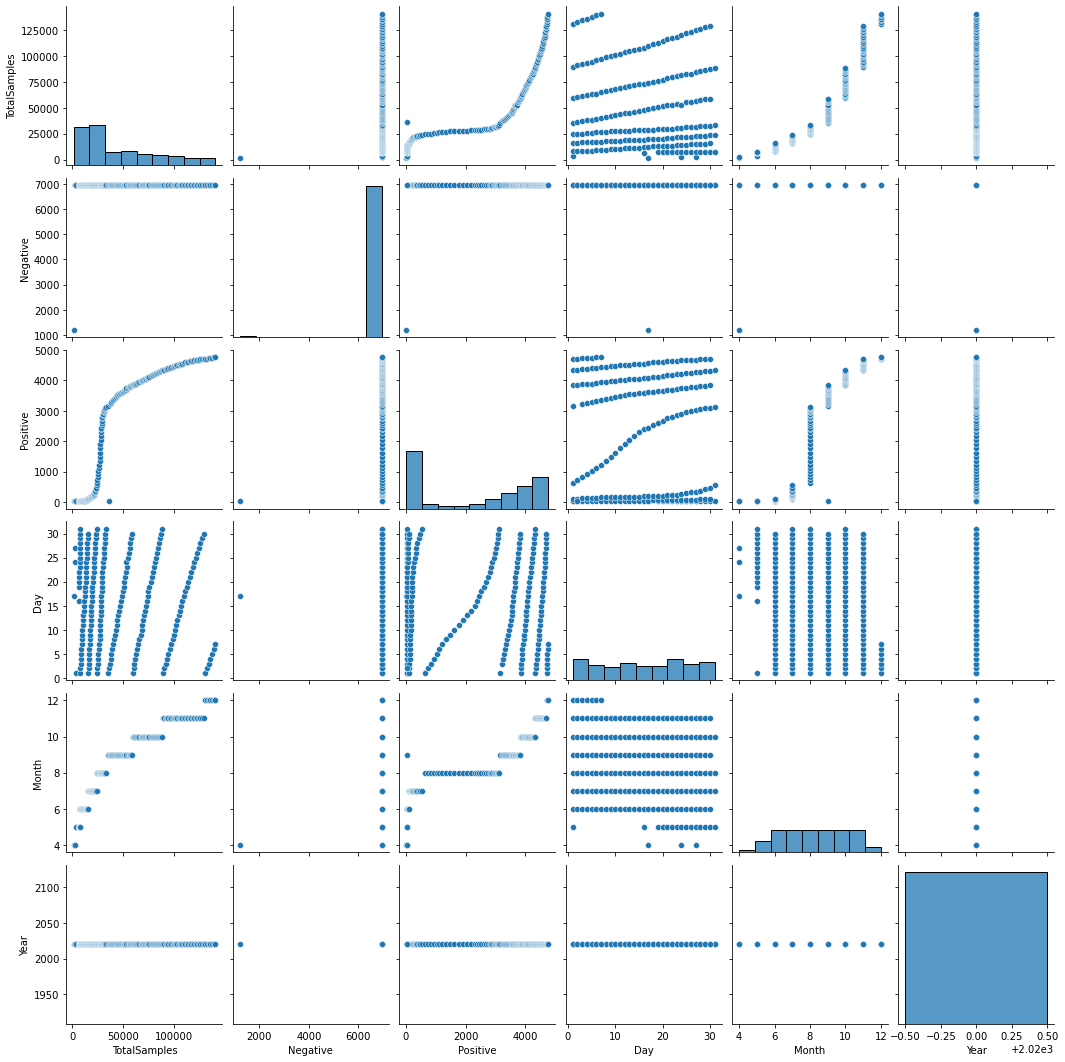

In [29]:
sns.pairplot(data = ani_data)

### Positive in the states

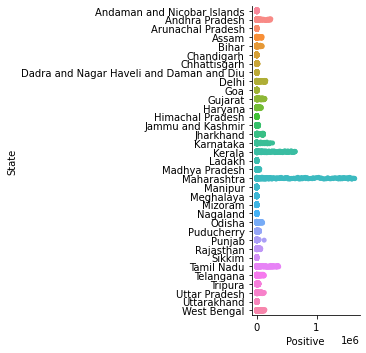

In [30]:
sns.catplot(x = "Positive",y = "State", data = data)

### Negatives in The State

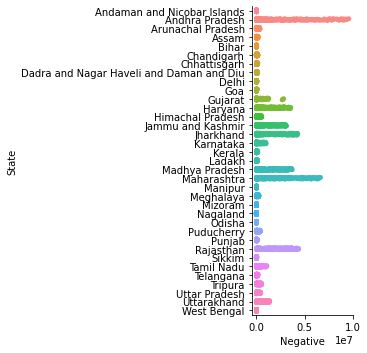

In [31]:
sns.catplot(x = "Negative",y = "State", data = data)

### GroupBy on a particular state for better visualization 

In [32]:
mh = states.get_group("Maharashtra")
mh_data = pd.DataFrame(mh)
mh_data.head()

,State,TotalSamples,Negative,Positive,Day,Month,Year
4397,Maharashtra,16008.0,14837.0,43.0,5,4,2020
4398,Maharashtra,17563.0,15808.0,868.0,6,4,2020
4399,Maharashtra,20877.0,19290.0,1018.0,7,4,2020
4400,Maharashtra,20877.0,19290.0,868.0,9,4,2020
4401,Maharashtra,30000.0,28865.0,1135.0,10,4,2020


<AxesSubplot:xlabel='Negative', ylabel='Count'>

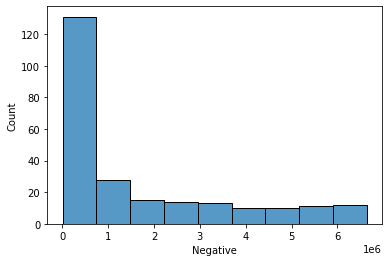

In [33]:
sns.histplot(x = "Negative", data = mh_data)

<AxesSubplot:xlabel='Positive', ylabel='Count'>

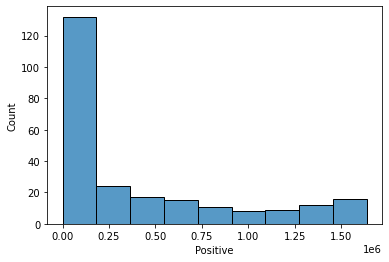

In [34]:
sns.histplot(x = "Positive", data = mh_data)

### Positives and Month

<AxesSubplot:xlabel='Positive', ylabel='Month'>

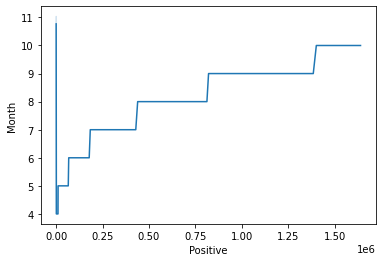

In [35]:
sns.lineplot(x = "Positive", y = "Month", data = mh_data)

As we can see, the number of positive people have been increased as the time passed. 

### Postives on Daily Basis

<AxesSubplot:xlabel='Positive', ylabel='Day'>

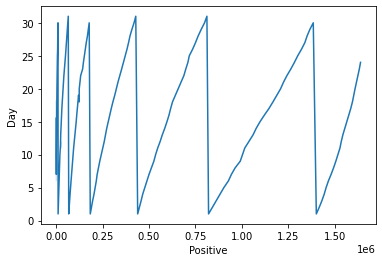

In [36]:
sns.lineplot(x = "Positive", y = "Day", data = mh_data)

The no of positiv people on daily basis as been very volatile.

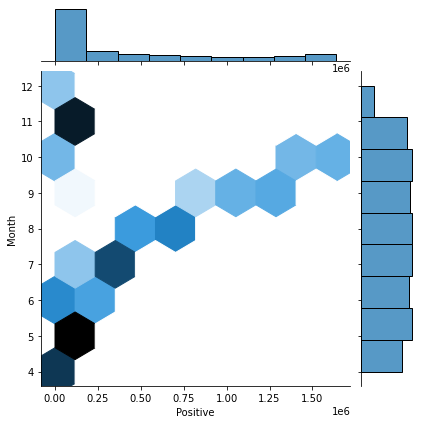

In [45]:
sns.jointplot(x = "Positive", y= "Month", data = mh_data, kind = "hex")

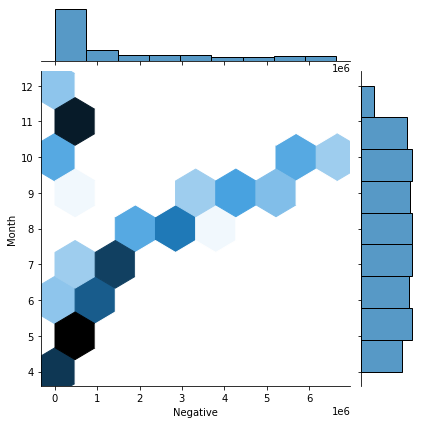

In [46]:
sns.jointplot(x = "Negative", y= "Month", data = mh_data, kind = "hex")